# Simple Linear Regression 

In simple linear regression, there is one independent variable (X) and one independent variable (y). Our aim is to find a function such that given some new value of (X), not in the original data, make our best guess about its corresponding (y). So, in ohter words we want to know the functional relation between these two variables. In simplest case we can assume that the relation between two variables are linear. 

$$ y = m * X + c + error           \quad \quad (1) $$            

Where, m and c are constant. 

But the relation can be more complicated that this. For example, there can be logarithemic relation as below:

$$ y = m * log(X) + c + error       \quad \quad (2) $$               

But, if we make a transformation and make a new variable such that $ X_{new} = log(X) $, then we can write the equation (2) as follows: 

$$ y = m * X_{new} + c + error     \quad \quad (3) $$

Which looks similar to the equation (1). So even if the relation between the variables are not linear we can make the transformation of the variable and retain the linear structure of the relationship. In this sence the score of linear regression is beyond the linear relationship of the variabels. 

In contract to the simple linear regression there is multiple linear regression where the dependent variable (y) depends on more than one independent variables (X). So X here is not a merely a vector but a matrix. 

# Method of least square 

In linear regression probelm we are given the set of numbers $ \{(x_1, y_1), (x_2, y_2), ... (x_n, y_n)\} $ and once we apple the linear regression to the set of independent variables $x_i 's $ we get the prediction for $y_i 's $. Let's say $ \{ y_1^p , y_2 ^ p, ... , y_n^p \}$ be the predicted y values in that order. These numbers are different from the original values $\{ y_1, y_2, ..., y_n\}$. Now, we can define a quantity called Residue Squared Error (RSS) as follows: 

$$ RSS = \sum_i^n (y_i - y_i^p)^2 = \sum_i ^n (y_i - m *x_i - c) ^2 \quad \quad (3) $$

Our aim is to minimize this quantity. Using calculus and taking the partial derivative of the above expression wrt m and c respectively (and separately) and setting them to zero to get the optimum value, we get: 

$$ \sum_i^n 2 (y_i -m * x_i -c) x_i = 0 $$

$$ \sum_i^n 2 (y_i -m * x_i -c) = 0 $$

Which simplify to the following two equations: 

$$ \sum_i^n y_i * x_i - m \sum_i^n x_i * x_i - c \sum_i^n x_i = 0  \quad \quad \quad \quad $$
$$ \sum_i^n y_i  - m \sum_i^n x_i - c *n  = 0  \quad \quad \quad \quad (5) $$

Combinly these two are system of two equations for two variables m and c. Once m and c are solved, we can go back to equation (1) and we get our desired equation. 

# Gradient descent method 

The method described above is called the normal equation method and the pair of equation in equation (5) are called the normal equations. In small data this method is good enough. But this can be slow in the larger data. So we use an alternative method called the gradient descent method. What follows is the math behind this method: 



# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [2]:
df = pd.read_csv('ex1data1.txt', header = None, names = ['populations', 'profit'])

In [3]:
df.head()

,populations,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Making features

In [4]:
x = df['populations']
X = x[:, np.newaxis]
y = df['profit']

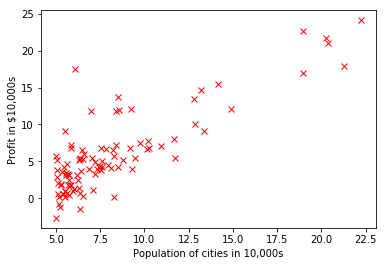

In [5]:
plt.plot(X, y, 'rx')
plt.xlabel('Population of cities in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# Linear fit using scikit learn 

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X, y)
xfit = np.linspace(5, 22, 5)
yfit = model.predict(xfit[:, np.newaxis])

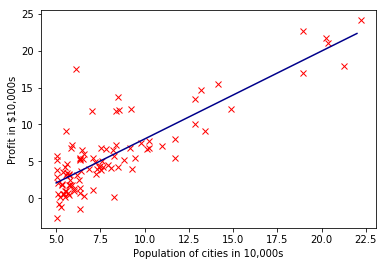

In [10]:
plt.plot(X, y, 'rx')
plt.plot(xfit, yfit, 'darkblue');
plt.xlabel('Population of cities in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# Accessing model accuracy 

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
y_pred = model.predict(X)

In [31]:
mean_squared_error(y, y_pred)

8.953942751950358

In [32]:
r2_score(y, y_pred)

0.7020315537841397

# Linear model using statsmodels

In [34]:
import statsmodels.formula.api as smf 

In [36]:
results = smf.ols('populations ~ profit', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            populations   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           1.02e-26
Time:                        13:10:13   Log-Likelihood:                -209.67
No. Observations:                  97   AIC:                             423.3
Df Residuals:                      95   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7238      0.315     14.995      0.000       4.098       5.349
profit         0.5884      0.039     14.961      0.000       0.510       0.667
==============================================================================
Omnibus:                       18.272   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.609
Skew:                          -0.666   Prob(JB):                     2.51e-09
Kurtosis:                       5.833   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""